In [2]:
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import B
.eta
from biogeme.expressions import log
import math
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
matched = shared[shared['MATCHED_FLAGGER'] == 1]
unmatched = shared[shared['MATCHED_FLAGGER'] == 0]

NameError: name 'shared' is not defined

In [4]:
sns.displot(matched['TRAVEL_TIME_MINUTES'])

NameError: name 'matched' is not defined

In [5]:
sns.displot(unmatched['TRAVEL_TIME_MINUTES'])

NameError: name 'unmatched' is not defined

In [6]:
private = df[df['SHARED_FLAGGER'] == 0] 

NameError: name 'df' is not defined

In [7]:
sns.displot(private['TRAVEL_TIME_MINUTES'])

NameError: name 'private' is not defined

In [8]:
requests = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Requests_Per_Hour.csv', index_col = 0)

In [9]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Estimation_File.csv')

In [10]:
tl = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Private_Unmatched_Trip_Length.csv')

In [11]:
#df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Estimation_File.csv', usecols = ['ORIGIN','DESTINATION','HHLDS_0_VEH_ORIGIN','HHLDS_0_VEH_DESTINATION','HHLDS_UNDER_35k_ORIGIN','HHLDS_UNDER_35k_DESTINATION','HHLDS_35k_100k_ORIGIN','HHLDS_35k_100k_DESTINATION','HHLDS_OVER_100k_ORIGIN','HHLDS_MEDIAN_INCOME_DESTINATION','HHLDS_MEDIAN_INCOME_ORIGIN','AVG_HHLD_SIZE_DESTINATION','AVG_HHLD_SIZE_ORIGIN','HHLDS_OVER_100k_DESTINATION','TRIP_LENGTH_MILES','TOD','MEDIAN_AGE_DESTINATION','MEDIAN_AGE_ORIGIN','NUM_TRIPS_POOLED','TOTAL_HHLDS_DESTINATION','TOTAL_HHLDS_ORIGIN','HHLDS_ORIGIN_DEN','HHLDS_DESTINATION_DEN','SHARED_FLAGGER'])

In [12]:
#pred = pd.read_csv('Predicted_Shared_Trips.csv')

In [13]:
df['MATCHED_FLAGGER'] = np.where(df['NUM_TRIPS_POOLED'] > 1, 1, 0)

In [14]:
df['HHLDS_UNDER_35k_ORIGIN'] = df['HHLDS_UNDER_35k_ORIGIN'].fillna(0)
df['HHLDS_UNDER_35k_DESTINATION'] = df['HHLDS_UNDER_35k_DESTINATION'].fillna(0)

df['HHLDS_35k_100k_ORIGIN'] = df['HHLDS_35k_100k_ORIGIN'].fillna(0)
df['HHLDS_35k_100k_DESTINATION'] = df['HHLDS_35k_100k_DESTINATION'].fillna(0)

df['HHLDS_OVER_100k_ORIGIN'] = df['HHLDS_OVER_100k_ORIGIN'].fillna(0)
df['HHLDS_OVER_100k_DESTINATION'] = df['HHLDS_OVER_100k_DESTINATION'].fillna(0)

In [15]:
df['AVG_HHLD_SIZE_ORIGIN'] = df['AVG_HHLD_SIZE_ORIGIN'].fillna(0)
df['AVG_HHLD_SIZE_DESTINATION'] = df['AVG_HHLD_SIZE_DESTINATION'].fillna(0)

df['HHLDS_MEDIAN_INCOME_ORIGIN'] = df['HHLDS_MEDIAN_INCOME_ORIGIN'].fillna(0)
df['HHLDS_MEDIAN_INCOME_DESTINATION'] = df['HHLDS_MEDIAN_INCOME_DESTINATION'].fillna(0)

In [16]:
df['HHLDS_UNDER_35k_ORIGIN_SHR'] = df['HHLDS_UNDER_35k_ORIGIN']/df['TOTAL_HHLDS_ORIGIN']
df['HHLDS_UNDER_35k_DESTINATION_SHR'] = df['HHLDS_UNDER_35k_DESTINATION']/df['TOTAL_HHLDS_DESTINATION']

In [17]:
df['HHLDS_UNDER_35K_0_VEH_ORIGIN'] = df['HHLDS_UNDER_35k_ORIGIN_SHR']*df['HHLDS_0_VEH_ORIGIN']
df['HHLDS_UNDER_35K_0_VEH_DESTINATION'] = df['HHLDS_UNDER_35k_DESTINATION_SHR']*df['HHLDS_0_VEH_DESTINATION']

In [18]:
df['HHLDS_UNDER_35K_0_VEH_ORIGIN'] = df['HHLDS_UNDER_35K_0_VEH_ORIGIN'].fillna(0)
df['HHLDS_UNDER_35K_0_VEH_DESTINATION'] = df['HHLDS_UNDER_35K_0_VEH_DESTINATION'].fillna(0)

In [19]:
df['MEDIAN_AGE_ORIGIN'] = df['MEDIAN_AGE_ORIGIN'].fillna(0)
df['MEDIAN_AGE_DESTINATION'] = df['MEDIAN_AGE_DESTINATION'].fillna(0)

In [20]:
df['HHLDS_ORIGIN_DEN_1k'] = df['HHLDS_ORIGIN_DEN']/1000

df['HHLDS_DESTINATION_DEN_1k'] = df['HHLDS_DESTINATION_DEN']/1000


In [21]:
def set_tod(row):
    
    if row['HOUR'] >= 22:
        row['TOD'] = 1

    elif row['HOUR'] < 6:
        row['TOD'] = 1
        
    elif (row['HOUR'] >= 6)&(row['HOUR'] < 9):
        row['TOD'] = 2        
        
    elif (row['HOUR'] >= 9)&(row['HOUR'] < 16):
        row['TOD'] = 3
        
        
    elif (row['HOUR'] >= 16)&(row['HOUR'] < 19):
        row['TOD'] = 4
        
    elif (row['HOUR'] >= 19)&(row['HOUR'] < 22):
        row['TOD'] = 5
        
    return row

In [22]:
#df = df.apply(lambda row: set_tod(row), axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843982 entries, 0 to 843981
Columns: 107 entries, Unnamed: 0 to HHLDS_DESTINATION_DEN_1k
dtypes: float64(80), int32(1), int64(20), object(6)
memory usage: 685.8+ MB


In [24]:
len(df)

843982

In [25]:
df['TOD'] = df['TOD'].astype(int)

In [26]:
requests.head()

,REQUESTS_PER_HOUR,ORIGIN,DESTINATION,TOD
0,0.219349,1.703101e+10,1.703101e+10,1
1,0.476471,1.703101e+10,1.703101e+10,2
2,0.319159,1.703101e+10,1.703101e+10,3
3,0.509346,1.703101e+10,1.703101e+10,4
4,0.496051,1.703101e+10,1.703101e+10,5


In [27]:
len(requests)

921219

In [28]:
len(requests.drop_duplicates(subset = ['ORIGIN','DESTINATION','TOD']))

921219

In [29]:
df2 = df.merge(requests, how = 'left', on = ['ORIGIN','DESTINATION','TOD'])

In [30]:
len(df2)

843982

In [31]:
len(df)

843982

In [32]:
df2 = df2.merge(tl, how = 'left', on = ['ORIGIN','DESTINATION','TOD'])

In [33]:
df2.head()

,Unnamed: 0_x,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES_x,ORIGIN_COM_AREA,...,MATCHED_FLAGGER,HHLDS_UNDER_35k_ORIGIN_SHR,HHLDS_UNDER_35k_DESTINATION_SHR,HHLDS_UNDER_35K_0_VEH_ORIGIN,HHLDS_UNDER_35K_0_VEH_DESTINATION,HHLDS_ORIGIN_DEN_1k,HHLDS_DESTINATION_DEN_1k,REQUESTS_PER_HOUR,Unnamed: 0_y,TRIP_LENGTH_MILES_y
0,0,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,...,0,0.011888,0.029352,8.833140,2.671053,20.111646,4.311072,0.125000,31522,7.700000
1,1,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,...,0,0.009379,0.003757,2.626066,6.863333,6.198089,8.254095,0.130000,44855,5.220000
2,2,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,...,0,0.004874,0.004297,2.485614,4.258689,6.000588,33.377308,0.133929,55616,4.183333
3,3,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,...,1,0.055019,0.022060,13.314498,8.559203,6.611149,5.774789,0.213415,78094,6.443750
4,4,2020,2,0,22,1.703122e+10,1.703122e+10,9.733333,2.7,48.0,...,0,0.015858,0.093407,4.662136,8.126374,9.557951,8.463877,0.222846,86088,8.343750


In [34]:
shared = df2[df2['SHARED_FLAGGER'] == 1]

In [35]:
database = db.Database('est_file', shared[['ORIGIN','DESTINATION','TRIP_LENGTH_MILES_y','HHLDS_ORIGIN_DEN_1k','HHLDS_DESTINATION_DEN_1k','REQUESTS_PER_HOUR']])

In [36]:
# making the Biogeme Database that is used for the model estimation
database = db.Database('est_file', shared[['YEAR','MONTH','DOW','REQUESTS_PER_HOUR','HOUR','ORIGIN','DESTINATION','TRIP_LENGTH_MILES_y','NUM_TRIPS_POOLED','SHARED_FLAGGER','INTERNAL_SUPPPRESSED_FLAGGER','AIRPORT_FLAGGER','TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5','TAX','EMP_ORIGIN_DEN','EMP_DESTINATION_DEN','MEDIAN_AGE_ORIGIN','MEDIAN_AGE_DESTINATION','HHLDS_ORIGIN_DEN_1k','HHLDS_DESTINATION_DEN_1k',
        'TOTAL_POP_ORIGIN','TOTAL_POP_DESTINATION','TOTAL_HHLDS_DESTINATION','AVG_HHLD_SIZE_DESTINATION','HHLDS_MEDIAN_INCOME_DESTINATION','TOTAL_EMP_ORIGIN','TOTAL_EMP_DESTINATION','TOTAL_EMP_FLOW','MATCHED_TRAVEL_TIME','UNMATCHED_TRAVEL_TIME','NUM_MATCHED_TRIPS','UNMATCHED_FARE','MATCHED_FARE',
       'TOTAL_HHLDS_ORIGIN', 'AVG_HHLD_SIZE_ORIGIN','HHLDS_OVER_100k_ORIGIN','HHLDS_OVER_100k_DESTINATION','MATCHED_FLAGGER',
       'HHLDS_MEDIAN_INCOME_ORIGIN', 'HHLDS_UNDER_35k_ORIGIN','HHLDS_UNDER_35k_DESTINATION','HHLDS_35k_100k_ORIGIN','HHLDS_35k_100k_DESTINATION','HHLDS_UNDER_35K_0_VEH_ORIGIN','HHLDS_UNDER_35K_0_VEH_DESTINATION',
       'HHLDS_0_VEH_ORIGIN','HHLDS_0_VEH_DESTINATION', 'AVG_VEH_PER_HHLD_ORIGIN','AVG_VEH_PER_HHLD_DESTINATION','POP_ORIGIN_DEN','POP_DESTINATION_DEN','HHLDS_ORIGIN_DEN','HHLDS_DESTINATION_DEN']])

In [37]:
# The following statement allows you to use the names of the
# variable as Python variable. (in the utility functions)
globals().update(database.variables)

In [38]:
# Unmatched Choice Parameters to be estimated
# Beta(name of the factor, initial value of the coefficient, lower bound, upper bound, whether or not the coefficinet should be fixed to initial value value)
c_fare =Beta('c_fare', 0, None, None, 0)
c_tax =Beta('c_tax', 0, None, None, 0)
c_cost =Beta('c_cost', 0, None, None, 0)

c_travel_time =Beta('c_travel_time', 0, None, None, 0)

In [39]:
# Matched Choice Parameters to be estimated
# Beta(name of the factor, initial value of the coefficient, lower bound, upper bound, whether or not the coefficinet should be fixed to initial value value)

c_matched_airport =Beta('c_matched_airport', 0, None, None, 0)
c_matched_pop_den =Beta('c_matched_pop_den', 0, None, None, 0)
c_matched_hhld_den =Beta('c_matched_hhld_den', 0, None, None, 0)
c_matched_tot_pop =Beta('c_matched_tot_pop', 0, None, None, 0)
c_matched_tot_hhlds =Beta('c_matched_tot_hhlds', 0, None, None, 0)
#c_private_avg_hh_size =Beta('c_private_avg_hh_size', 0, None, None, 0)
c_matched_avg_veh_per_hhld =Beta('c_matched_avg_veh_per_hhld', 0, None, None, 0)
c_matched_tot_hhlds_200k_plus =Beta('c_matched_tot_hhlds_200k_plus', 0, None, None, 0)
c_matched_tot_hhlds_zero_veh_origin =Beta('c_matched_tot_hhlds_zero_veh_origin', 0, None, None, 0)
c_matched_emp_flow =Beta('c_matched_emp_flow', 0, None, None, 0)

c_matched_hhld_median_income_origin =Beta('c_matched_hhld_median_income_origin', 0, None, None, 0)
c_matched_hhld_median_income_dest =Beta('c_matched_hhld_median_income_dest', 0, None, None, 0)

c_matched_trip_length =Beta('c_matched_trip_length', 0, None, None, 0)
c_matched_pop_den_origin =Beta('c_matched_pop_den_origin', 0, None, None, 0)
c_matched_pop_den_dest =Beta('c_matched_pop_den_dest', 0, None, None, 0)

c_matched_hhlds_den_origin =Beta('c_matched_hhlds_den_origin', 0, None, None, 0)
c_matched_hhlds_den_dest =Beta('c_matched_hhlds_den_dest', 0, None, None, 0)


c_matched_constant = Beta('c_matched_constant', 0, None, None, 0)

c_matched_median_age_origin =Beta('c_matched_median_age_origin', 0, None, None, 0)
c_matched_median_age_dest =Beta('c_matched_median_age_dest', 0, None, None, 0)

c_matched_shared_trips = Beta('c_matched_shared_trips', 0, None, None, 0)

In [91]:
# defining the unmatched utility function
V0 =  0

# defining the matched utility function
V1 = c_matched_constant 

In [92]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                       Value   Std err    t-test  p-value  Rob. Std err  \
c_matched_constant  0.787356  0.005103  154.2984      0.0      0.005103   

                    Rob. t-test  Rob. p-value  
c_matched_constant    154.29847           0.0  


In [197]:
results.getGeneralStatistics()

{'Number of estimated parameters': (1, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-146198.6097470288, '.7g'),
 'Final log likelihood': (-111009.57437115465, '.7g'),
 'Likelihood ratio test for the init. model': (70378.07075174828, '.7g'),
 'Rho-square for the init. model': (0.24069336525677387, '.3g'),
 'Rho-square-bar for the init. model': (0.24068652524645007, '.3g'),
 'Akaike Information Criterion': (222021.1487423093, '.7g'),
 'Bayesian Information Criterion': (222031.24209968135, '.7g'),
 'Final gradient norm': (0.9756071859044368, '.4E'),
 'Nbr of threads': (8, '')}

In [42]:
# add in travel time
V0 =  c_travel_time * UNMATCHED_TRAVEL_TIME

V1 = c_matched_constant + c_travel_time * MATCHED_TRAVEL_TIME

In [43]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                        Value   Std err    t-test   p-value  Rob. Std err  \
c_matched_constant -15.829421  5.165760 -3.064297  0.002182      0.015642   
c_travel_time        7.404400  2.934318  2.523380  0.011623      0.002340   

                    Rob. t-test  Rob. p-value  
c_matched_constant -1011.985745           0.0  
c_travel_time       3164.418572           0.0  


In [44]:
results.getGeneralStatistics()

{'Number of estimated parameters': (2, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-111009.57435871573, '.7g'),
 'Final log likelihood': (-0.056413718841705505, '.7g'),
 'Likelihood ratio test for the init. model': (222019.03588999377, '.7g'),
 'Rho-square for the init. model': (0.9999994918121328, '.3g'),
 'Rho-square-bar for the init. model': (0.9999814753481335, '.3g'),
 'Akaike Information Criterion': (4.112827437683411, '.7g'),
 'Bayesian Information Criterion': (24.299542181778737, '.7g'),
 'Final gradient norm': (0.043134510640684916, '.4E'),
 'Nbr of threads': (8, '')}

In [47]:
# try trip length instead
V0 =  0

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES

In [48]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                          Value   Std err      t-test  p-value  Rob. Std err  \
c_matched_constant    -0.119895  0.008848  -13.551087      0.0      0.010483   
c_matched_trip_length  0.194304  0.001760  110.425720      0.0      0.002399   

                       Rob. t-test  Rob. p-value  
c_matched_constant      -11.437636           0.0  
c_matched_trip_length    80.987644           0.0  


In [49]:
results.getGeneralStatistics()

{'Number of estimated parameters': (2, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-1943868.7175780742, '.7g'),
 'Final log likelihood': (-102364.88872261718, '.7g'),
 'Likelihood ratio test for the init. model': (3683007.657710914, '.7g'),
 'Rho-square for the init. model': (0.9473396079699473, '.3g'),
 'Rho-square-bar for the init. model': (0.9473385790938808, '.3g'),
 'Akaike Information Criterion': (204733.77744523436, '.7g'),
 'Bayesian Information Criterion': (204753.96415997847, '.7g'),
 'Final gradient norm': (11.497724194861945, '.4E'),
 'Nbr of threads': (8, '')}

In [58]:
# add in employment flows
V0 =  0

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_emp_flow * TOTAL_EMP_FLOW

In [59]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                          Value   Std err      t-test  p-value  Rob. Std err  \
c_matched_constant    -0.163980  0.009092  -18.036109      0.0      0.010806   
c_matched_emp_flow     0.000594  0.000029   20.208258      0.0      0.000033   
c_matched_trip_length  0.198456  0.001779  111.566381      0.0      0.002439   

                       Rob. t-test  Rob. p-value  
c_matched_constant      -15.174299           0.0  
c_matched_emp_flow       17.841335           0.0  
c_matched_trip_length    81.356070           0.0  


In [60]:
results.getGeneralStatistics()

{'Number of estimated parameters': (3, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-115322.77861084645, '.7g'),
 'Final log likelihood': (-102119.77065601753, '.7g'),
 'Likelihood ratio test for the init. model': (26406.015909657843, '.7g'),
 'Rho-square for the init. model': (0.11448742489445307, '.3g'),
 'Rho-square-bar for the init. model': (0.11446141095309526, '.3g'),
 'Akaike Information Criterion': (204245.54131203506, '.7g'),
 'Bayesian Information Criterion': (204275.8213841512, '.7g'),
 'Final gradient norm': (0.49107009700993304, '.4E'),
 'Nbr of threads': (8, '')}

In [62]:
for col in shared.columns:
    print(col)

YEAR
MONTH
DOW
HOUR
ORIGIN
DESTINATION
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
ORIGIN_COM_AREA
DEST_COM_AREA
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
SHARED_FLAGGER
NUM_TRIPS_POOLED
SPEED
TRIP_ID
TRIP_START_TIME
TRIP_END_TIME
INTERNAL_UNSUPPRESSED_FLAGGER
INTERNAL_SUPPPRESSED_FLAGGER
EXTERNAL_FLAGGER
INTERNAL_EXTERNAL_FLAGGER
AIRPORT_FLAGGER
TOD_1
TOD_2
TOD_3
TOD_4
TOD_5
TRIP_TYPE
walk_distance
travel_time
TOD
TOTAL_POP_ORIGIN
MEDIAN_AGE_ORIGIN
TOTAL_HHLDS_ORIGIN
AVG_HHLD_SIZE_ORIGIN
HHLDS_MEAN_INCOME_ORIGIN
HHLDS_UNDER_35k_ORIGIN
HHLDS_35k_100k_ORIGIN
HHLDS_OVER_100k_ORIGIN
HHLDS_0_VEH_ORIGIN
AVG_VEH_PER_HHLD_ORIGIN
HHLDS_MEDIAN_INCOME_ORIGIN
TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN
TOTAL_MALE_ORIGIN
TOTAL_FEMALE_ORIGIN
MEDIAN_AGE_ORIGIN.1
TOTAL_POP_DESTINATION
MEDIAN_AGE_DESTINATION
TOTAL_HHLDS_DESTINATION
AVG_HHLD_SIZE_DESTINATION
HHLDS_MEAN_INCOME_DESTINATION
HHLDS_UNDER_35k_DESTINATION
HHLDS_35k_100k_DESTINATION
HHLDS_OVER_100k_DESTINATION
HHLDS_0_VEH_DESTINATION
AVG_VEH_PER_HHLD_DESTINA

In [65]:
# try fare
V0 =  0 + c_fare*UNMATCHED_FARE

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_emp_flow * TOTAL_EMP_FLOW + c_fare*MATCHED_FARE

In [66]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                          Value   Std err      t-test  p-value  Rob. Std err  \
c_fare                 0.905845  0.009654   93.834135      0.0      0.010922   
c_matched_constant     1.344277  0.017571   76.506489      0.0      0.018323   
c_matched_emp_flow     0.000524  0.000029   18.045518      0.0      0.000032   
c_matched_trip_length  0.448751  0.003464  129.561602      0.0      0.004353   

                       Rob. t-test  Rob. p-value  
c_fare                   82.939178           0.0  
c_matched_constant       73.363843           0.0  
c_matched_emp_flow       16.591009           0.0  
c_matched_trip_length   103.084663           0.0  


In [67]:
results.getGeneralStatistics()

{'Number of estimated parameters': (4, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-102119.77065601753, '.7g'),
 'Final log likelihood': (-97277.24821730533, '.7g'),
 'Likelihood ratio test for the init. model': (9685.0448774244, '.7g'),
 'Rho-square for the init. model': (0.04742002853711702, '.3g'),
 'Rho-square-bar for the init. model': (0.04738085884476162, '.3g'),
 'Akaike Information Criterion': (194562.49643461066, '.7g'),
 'Bayesian Information Criterion': (194602.86986409884, '.7g'),
 'Final gradient norm': (0.03901915060001539, '.4E'),
 'Nbr of threads': (8, '')}

In [91]:
# try population density
V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_emp_flow * TOTAL_EMP_FLOW + c_matched_pop_den_dest * POP_DESTINATION_DEN + c_matched_pop_den_origin * POP_ORIGIN_DEN

In [92]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                             Value       Std err      t-test  p-value  \
c_matched_constant       -0.485296  1.468297e-02  -33.051639      0.0   
c_matched_emp_flow        0.000569  2.912674e-05   19.546468      0.0   
c_matched_pop_den_dest    0.000007  3.922237e-07   18.463512      0.0   
c_matched_pop_den_origin  0.000007  3.842292e-07   18.012192      0.0   
c_matched_trip_length     0.202550  1.788483e-03  113.252362      0.0   

                          Rob. Std err  Rob. t-test  Rob. p-value  
c_matched_constant        1.633815e-02   -29.703258           0.0  
c_matched_emp_flow        3.249940e-05    17.518009           0.0  
c_matched_pop_den_dest    4.462073e-07    16.229735           0.0  
c_matched_pop_den_origin  4.029426e-07    17.175671           0.0  
c_matched_trip_length     2.444584e-03    82.856596           0.0  


In [93]:
results.getGeneralStatistics()

{'Number of estimated parameters': (5, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-116654.75073243673, '.7g'),
 'Final log likelihood': (-101717.9596279941, '.7g'),
 'Likelihood ratio test for the init. model': (29873.58220888526, '.7g'),
 'Rho-square for the init. model': (0.12804271588306038, '.3g'),
 'Rho-square-bar for the init. model': (0.12799985436247419, '.3g'),
 'Akaike Information Criterion': (203445.9192559882, '.7g'),
 'Bayesian Information Criterion': (203496.38604284843, '.7g'),
 'Final gradient norm': (0.35824198151505693, '.4E'),
 'Nbr of threads': (8, '')}

In [79]:
# try household density

V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_emp_flow * TOTAL_EMP_FLOW + c_matched_hhlds_den_dest * HHLDS_DESTINATION_DEN + c_matched_hhlds_den_origin * HHLDS_ORIGIN_DEN

In [80]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                               Value       Std err      t-test  p-value  \
c_matched_constant         -0.501533  1.268119e-02  -39.549381      0.0   
c_matched_emp_flow          0.000501  2.866259e-05   17.480590      0.0   
c_matched_hhlds_den_dest    0.000016  6.446661e-07   25.452122      0.0   
c_matched_hhlds_den_origin  0.000014  6.213900e-07   23.108623      0.0   
c_matched_trip_length       0.205127  1.795737e-03  114.230011      0.0   

                            Rob. Std err  Rob. t-test  Rob. p-value  
c_matched_constant          1.460815e-02   -34.332435           0.0  
c_matched_emp_flow          3.125449e-05    16.030942           0.0  
c_matched_hhlds_den_dest    7.721384e-07    21.250233           0.0  
c_matched_hhlds_den_origin  6.740927e-07    21.301919           0.0  
c_matched_trip_length       2.460671e-03    83.362217           0.0  


In [81]:
results.getGeneralStatistics()

{'Number of estimated parameters': (5, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-116654.03933012532, '.7g'),
 'Final log likelihood': (-101349.99040529973, '.7g'),
 'Likelihood ratio test for the init. model': (30608.09784965118, '.7g'),
 'Rho-square for the init. model': (0.13119176166301338, '.3g'),
 'Rho-square-bar for the init. model': (0.13114889988104073, '.3g'),
 'Akaike Information Criterion': (202709.98081059946, '.7g'),
 'Bayesian Information Criterion': (202760.4475974597, '.7g'),
 'Final gradient norm': (0.9575275079202501, '.4E'),
 'Nbr of threads': (8, '')}

In [86]:
# try employment density
V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_emp_flow * TOTAL_EMP_FLOW + c_matched_hhlds_den_dest * EMP_DESTINATION_DEN + c_matched_hhlds_den_origin * EMP_ORIGIN_DEN

In [87]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                               Value   Std err      t-test  p-value  \
c_matched_constant         -0.203045  0.009391  -21.620207      0.0   
c_matched_emp_flow         -0.001174  0.000108  -10.867591      0.0   
c_matched_hhlds_den_dest    0.000099  0.000009   11.284532      0.0   
c_matched_hhlds_den_origin  0.000634  0.000045   13.931014      0.0   
c_matched_trip_length       0.201504  0.001795  112.288276      0.0   

                            Rob. Std err  Rob. t-test  Rob. p-value  
c_matched_constant              0.011123   -18.254553           0.0  
c_matched_emp_flow              0.000115   -10.238946           0.0  
c_matched_hhlds_den_dest        0.000009    10.898290           0.0  
c_matched_hhlds_den_origin      0.000049    12.988914           0.0  
c_matched_trip_length           0.002465    81.740987           0.0  


In [88]:
results.getGeneralStatistics()

{'Number of estimated parameters': (5, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-116654.04003058838, '.7g'),
 'Final log likelihood': (-101941.955061827, '.7g'),
 'Likelihood ratio test for the init. model': (29424.16993752276, '.7g'),
 'Rho-square for the init. model': (0.12611723490162585, '.3g'),
 'Rho-square-bar for the init. model': (0.12607437311991054, '.3g'),
 'Akaike Information Criterion': (203893.910123654, '.7g'),
 'Bayesian Information Criterion': (203944.37691051423, '.7g'),
 'Final gradient norm': (0.12258842779651637, '.4E'),
 'Nbr of threads': (8, '')}

In [99]:
for yr_mn in df['YEAR_MONTH'].unique():
    
    print(str(yr_mn) + ' : ' + str(len(df[(df['YEAR_MONTH'] == yr_mn)&(df['SHARED_FLAGGER'] == 1)&(df['NUM_TRIPS_POOLED'] == 1)])))


201908 : 3236
201910 : 3006
201911 : 2727
201905 : 3636
202002 : 3055
201904 : 3743
201901 : 4536
201906 : 2806
201907 : 3501
201903 : 3715
201912 : 2922
201812 : 3908
202001 : 3706
201909 : 2935
201902 : 3656
201811 : 4792


In [101]:
for yr_mn in df['YEAR_MONTH'].unique():
    
    print(str(yr_mn) + ' : ' + str(len(df[(df['YEAR_MONTH'] == yr_mn)&(df['SHARED_FLAGGER'] == 1)&(df['NUM_TRIPS_POOLED'] > 1)])))


201908 : 5477
201910 : 4970
201911 : 4549
201905 : 9851
202002 : 5192
201904 : 10359
201901 : 11492
201906 : 6926
201907 : 6148
201903 : 11692
201912 : 4553
201812 : 9151
202001 : 5780
201909 : 5012
201902 : 11033
201811 : 10616


In [102]:
for yr_mn in df['YEAR_MONTH'].unique():
    
    print(str(yr_mn) + ' : ' + str(len(df[(df['YEAR_MONTH'] == yr_mn)&(df['SHARED_FLAGGER'] == 0)&(df['NUM_TRIPS_POOLED'] == 1)])))


201908 : 44197
201910 : 47648
201911 : 44575
201905 : 45027
202002 : 41742
201904 : 41255
201901 : 37732
201906 : 39185
201907 : 44097
201903 : 41659
201912 : 45240
201812 : 33482
202001 : 43375
201909 : 40628
201902 : 37739
201811 : 37720


In [201]:
shared['SHARED_PROBABILITY']

10        19.176261
13        19.176261
14        19.176261
18        19.176261
19        19.176261
            ...    
843970     0.313051
843971     0.389735
843973     0.239205
843978     0.259067
843981     0.326428
Name: SHARED_PROBABILITY, Length: 178681, dtype: float64

In [37]:
# try shared trips instead of emp variables

V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_shared_trips * REQUESTS_PER_HOUR

In [102]:
# try household density 1k increments per acre

V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES + c_matched_shared_trips * REQUESTS_PER_HOUR + c_matched_hhlds_den_dest * HHLDS_DESTINATION_DEN_1k + c_matched_hhlds_den_origin * HHLDS_ORIGIN_DEN_1k

In [103]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

biogemeError: Variables in formula loglike missing in the database: ['TRIP_LENGTH_MILES']

In [100]:
# try household density 1k increments per acre
#USE THIS MODEL 

V0 =  0 

V1 = c_matched_constant + c_matched_trip_length * TRIP_LENGTH_MILES_y + c_matched_shared_trips * REQUESTS_PER_HOUR + c_matched_hhlds_den_dest * HHLDS_DESTINATION_DEN_1k + c_matched_hhlds_den_origin * HHLDS_ORIGIN_DEN_1k

In [99]:
# Associate utility functions with the numbering of alternatives (corresponds to the SHARED_FLAGGER field)
V = {0: V0, 1: V1}

# Associate the availability conditions with the alternatives
# for this model, all migrants had all alternatives theoretically available so all are equal to 1 (available)
# if individual people had different availability for alterantives, could pass in a column of the dataframe to account for that availability
av = {}
for i in range(0, 2):
    av[i] = 1

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# estimating the CHOSEN field
logprob = models.loglogit(V, av, MATCHED_FLAGGER)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'rh_matched_choice'

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults)

                               Value   Std err     t-test  p-value  \
c_matched_constant         -0.361023  0.015720 -22.965282      0.0   
c_matched_hhlds_den_dest    0.016326  0.000630  25.912929      0.0   
c_matched_hhlds_den_origin  0.011812  0.000611  19.332993      0.0   
c_matched_shared_trips      0.323197  0.011093  29.136026      0.0   
c_matched_trip_length       0.147806  0.002044  72.325672      0.0   

                            Rob. Std err  Rob. t-test  Rob. p-value  
c_matched_constant              0.017790   -20.293171           0.0  
c_matched_hhlds_den_dest        0.000749    21.790349           0.0  
c_matched_hhlds_den_origin      0.000658    17.950280           0.0  
c_matched_shared_trips          0.012843    25.164649           0.0  
c_matched_trip_length           0.002395    61.707588           0.0  


In [98]:
results.getGeneralStatistics()

{'Number of estimated parameters': (5, ''),
 'Sample size': (178681, ''),
 'Excluded observations': (0, ''),
 'Init log likelihood': (-139755.10193494437, '.7g'),
 'Final log likelihood': (-107374.79776695998, '.7g'),
 'Likelihood ratio test for the init. model': (64760.60833596878, '.7g'),
 'Rho-square for the init. model': (0.23169318128405314, '.3g'),
 'Rho-square-bar for the init. model': (0.23165740441486715, '.3g'),
 'Akaike Information Criterion': (214759.59553391996, '.7g'),
 'Bayesian Information Criterion': (214810.06232078018, '.7g'),
 'Final gradient norm': (0.5173166318358979, '.4E'),
 'Nbr of threads': (8, '')}

In [18]:
for col in df.columns:
    print(col)

YEAR
MONTH
DOW
HOUR
ORIGIN
DESTINATION
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
ORIGIN_COM_AREA
DEST_COM_AREA
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
SHARED_FLAGGER
NUM_TRIPS_POOLED
SPEED
TRIP_ID
TRIP_START_TIME
TRIP_END_TIME
INTERNAL_UNSUPPRESSED_FLAGGER
INTERNAL_SUPPPRESSED_FLAGGER
EXTERNAL_FLAGGER
INTERNAL_EXTERNAL_FLAGGER
AIRPORT_FLAGGER
TOD_1
TOD_2
TOD_3
TOD_4
TOD_5
TRIP_TYPE
walk_distance
travel_time
TOD
TOTAL_POP_ORIGIN
MEDIAN_AGE_ORIGIN
TOTAL_HHLDS_ORIGIN
AVG_HHLD_SIZE_ORIGIN
HHLDS_MEAN_INCOME_ORIGIN
HHLDS_UNDER_35k_ORIGIN
HHLDS_35k_100k_ORIGIN
HHLDS_OVER_100k_ORIGIN
HHLDS_0_VEH_ORIGIN
AVG_VEH_PER_HHLD_ORIGIN
HHLDS_MEDIAN_INCOME_ORIGIN
TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN
TOTAL_MALE_ORIGIN
TOTAL_FEMALE_ORIGIN
MEDIAN_AGE_ORIGIN.1
TOTAL_POP_DESTINATION
MEDIAN_AGE_DESTINATION
TOTAL_HHLDS_DESTINATION
AVG_HHLD_SIZE_DESTINATION
HHLDS_MEAN_INCOME_DESTINATION
HHLDS_UNDER_35k_DESTINATION
HHLDS_35k_100k_DESTINATION
HHLDS_OVER_100k_DESTINATION
HHLDS_0_VEH_DESTINATION
AVG_VEH_PER_HHLD_DESTINA

In [519]:
#shared['UNMATCHED_UTILITY'] = 0
#shared['MATCHED_UTILITY'] = -0.194973 + shared['TRIP_LENGTH_MILES']*0.200174 + shared['SHARED_PROBABILITY'] * 0.002617

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [484]:
#shared['UNMATCHED_UTILITY'] = 0
#shared['MATCHED_UTILITY'] = -0.501578 + shared['TRIP_LENGTH_MILES']*0.205130 + shared['TOTAL_EMP_FLOW']*0.000501 + shared['HHLDS_ORIGIN_DEN_1k']*0.014361 + shared['HHLDS_DESTINATION_DEN_1k']* 0.016409

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
shared['UNMATCHED_UTILITY'] = 0
shared['MATCHED_UTILITY'] = -0.673041 + shared['TRIP_LENGTH_MILES']* 0.212605 + shared['HHLDS_ORIGIN_DEN_1k']* 0.012540 + shared['HHLDS_DESTINATION_DEN_1k']* 0.016882 + shared['REQUESTS_PER_HOUR'] * 0.372965

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
shared.MATCHED_UTILITY.mean()

0.9645039539410789

In [45]:
shared['UNMATCHED_PROBABILITY'] = np.exp(shared['UNMATCHED_UTILITY'])/(np.exp(shared['MATCHED_UTILITY']) + np.exp(shared['UNMATCHED_UTILITY']))
shared['UNMATCHED_PROBABILITY'].mean()

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.3127370177798534

In [46]:
shared['MATCHED_PROBABILITY'] = np.exp(shared['MATCHED_UTILITY'])/(np.exp(shared['MATCHED_UTILITY']) + np.exp(shared['UNMATCHED_UTILITY']))
shared['MATCHED_PROBABILITY'].mean()

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.6872629822201543

In [47]:
shared['OBSERVED_UNMATCHED_TRIP'] = np.where(shared['MATCHED_FLAGGER'] == 0, 1, 0)

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
shared['OBSERVED_MATCHED_TRIP'] = np.where(shared['MATCHED_FLAGGER'] == 1, 1, 0)

C:\Users\ramu225\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
shared['OBSERVED_MATCHED_TRIP'].sum()/len(shared)

0.6872638948741052

In [50]:
shared['OBSERVED_UNMATCHED_TRIP'].sum()/len(shared)

0.3127361051258947

In [51]:
shared[['MATCHED_PROBABILITY', 'HOUR']].groupby(by = 'HOUR').mean()

,MATCHED_PROBABILITY
HOUR,
1,0.673161
2,0.664387
3,0.691747
4,0.717779
5,0.727474
6,0.730286
7,0.710323
8,0.697949
9,0.675336


In [52]:
shared['OBSERVED_MATCHED_TRIP'].sum()

122801

In [53]:
shared['MATCHED_PROBABILITY'].sum()

122800.83692607842

In [54]:
df2 = shared[['ORIGIN','OBSERVED_MATCHED_TRIP', 'OBSERVED_UNMATCHED_TRIP','UNMATCHED_PROBABILITY','MATCHED_PROBABILITY',]].groupby(by = 'ORIGIN', as_index = False).sum()

In [55]:
df2['OBSERVED_UNMATCHED_SHR'] = df2['OBSERVED_UNMATCHED_TRIP']/(df2['OBSERVED_UNMATCHED_TRIP'] + df2['OBSERVED_MATCHED_TRIP'])

df2['PREDICTED_UNMATCHED_SHR'] = df2['UNMATCHED_PROBABILITY']/(df2['UNMATCHED_PROBABILITY'] + df2['MATCHED_PROBABILITY'])

In [56]:
df2['OBSERVED_MATCHED_SHR'] = df2['OBSERVED_MATCHED_TRIP']/(df2['OBSERVED_MATCHED_TRIP'] + df2['OBSERVED_UNMATCHED_TRIP'])

df2['PREDICTED_MATCHED_SHR'] = df2['MATCHED_PROBABILITY']/(df2['MATCHED_PROBABILITY'] + df2['UNMATCHED_PROBABILITY'])

In [57]:
df2['UNMATCHED_TRIPS_DIFF'] = df2['UNMATCHED_PROBABILITY'] - df2['OBSERVED_UNMATCHED_TRIP']

In [58]:
df2['MATCHED_TRIPS_DIFF'] = df2['MATCHED_PROBABILITY'] - df2['OBSERVED_MATCHED_TRIP']

In [59]:
df2['MATCHED_SHR_DIFF'] = df2['PREDICTED_MATCHED_SHR'] - df2['OBSERVED_MATCHED_SHR']

In [60]:
df2['MATCHED_SHR_DIFF'].mean()

0.007472688438624262

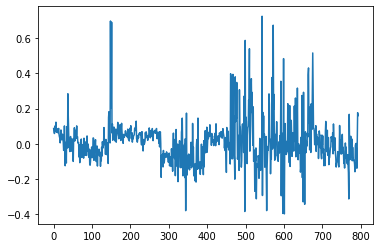

In [61]:
df2['MATCHED_SHR_DIFF'].plot()

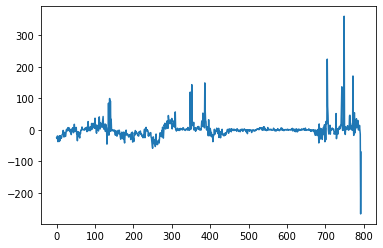

In [62]:
df2['UNMATCHED_TRIPS_DIFF'].plot()

In [63]:
df2[df2['UNMATCHED_TRIPS_DIFF'] < -1000]

,ORIGIN,OBSERVED_MATCHED_TRIP,OBSERVED_UNMATCHED_TRIP,UNMATCHED_PROBABILITY,MATCHED_PROBABILITY,OBSERVED_UNMATCHED_SHR,PREDICTED_UNMATCHED_SHR,OBSERVED_MATCHED_SHR,PREDICTED_MATCHED_SHR,UNMATCHED_TRIPS_DIFF,MATCHED_TRIPS_DIFF,MATCHED_SHR_DIFF


In [107]:
import geopandas as gp

geo = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')


In [108]:
geo['geoid10'] = geo.geoid10.astype(float)

In [109]:
centroids = pd.read_csv('C:/Workspace/TNC-Demand-Model/otp/points.csv')
centroids = gp.GeoDataFrame(centroids)
centroids['GEOID']  = centroids['GEOID'].astype(float)

In [110]:
import folium

In [111]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [0, 0.3, 0.5, 0.7, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Observed Matched Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'OBSERVED_MATCHED_SHR'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Obs Matched Share of Trips',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Observed_Matched_Share.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


KeyError: 'OBSERVED_MATCHED_SHR'

In [69]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [0, 0.3, 0.5, 0.7, 0.9, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Predicted Matched Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'PREDICTED_MATCHED_SHR'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Pred Matched Share of Trips',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Predicted_Matched_Share.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [70]:
df2['MATCHED_SHR_DIFF'].min()

-0.3981190161523013

In [71]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-0.5, -0.1, 0, 0.1, 0.5, 1]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Difference Matched Share of Trips',
 data=df2,
 columns = ['ORIGIN', 'MATCHED_SHR_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Matched Share of Trips',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Difference_Matched_Share.html')



In [75]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [ -500, -100, 0, 100, 500]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Matched Total Trips Difference',
 data=df2,
 columns = ['ORIGIN', 'MATCHED_TRIPS_DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Matched Number of Trips Difference',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Matched_Trips_Difference.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [73]:
df2.MATCHED_TRIPS_DIFF.min()

-360.7144824168163

In [74]:
df2.MATCHED_TRIPS_DIFF.max()

266.8036029601403

In [31]:
pandasResults

NameError: name 'pandasResults' is not defined

In [54]:
df2['TRIP_LENGTH_MILES'].mean()

4.93364206819597

In [53]:
df2['UNMATCHED_TRAVEL_TIME'].mean()

12.678648567262812

In [104]:
df['TRIPS'] = 1

In [105]:
df3 = df[['ORIGIN','TRIPS']].groupby(by = 'ORIGIN', as_index = False).sum()

In [117]:
import folium
#Make a total rh trips choropleth map

# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)



#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [ 0, 2500, 10000, 20000, 35000, 45000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'Ride Hailing Pickups',
 data=df3,
 columns = ['ORIGIN', 'TRIPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Ride Hailing Pickups',
 highlight = True
)

#folium.LayerControl().add_to(m)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

    
folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Private Shared Logit Model' + '/Total_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [40]:
shared['TRIP_LENGTH_MILES_y'].mean()

5.144980881883236

In [41]:
shared['REQUESTS_PER_HOUR'].mean()

0.472777369849754

In [42]:
shared['HHLDS_DESTINATION_DEN_1k'].mean()

10.211534796814481

In [43]:
shared['HHLDS_ORIGIN_DEN_1k'].mean()

10.182561514377593

In [ ]:
unmatched 0.31
matched 0.69